In [1]:
"""
Units of quantities--->
torque: N/m
pressures: bar
air/water flow: Lt/min
noise: db
ground accelerations along x,y,z axes (gaxxy,gaccy,gaccz): m/s^2
head accelerations (haxxy,haccy,haccz) along x,y,z axes: m/s^2
rpm: revolutions/min
powers: Watt
temperatures: (degree)C
source: https://www.kaggle.com/datasets/afumetto/predictive-maintenance-dataset-air-compressor?select=data.csv
"""

'\nUnits of quantities--->\ntorque: N/m\npressures: bar\nair/water flow: Lt/min\nnoise: db\nground accelerations along x,y,z axes (gaxxy,gaccy,gaccz): m/s^2\nhead accelerations (haxxy,haccy,haccz) along x,y,z axes: m/s^2\nrpm: revolutions/min\npowers: Watt\ntemperatures: (degree)C\nsource: https://www.kaggle.com/datasets/afumetto/predictive-maintenance-dataset-air-compressor?select=data.csv\n'

In [2]:
# Load dataset
import pandas as pd
df=pd.read_csv("processed_data.csv")

In [3]:
# View data
df.head()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,acmotor
0,1,499,1405.842858,27.511708,1.000,616.579758,40.840517,78.554715,2.960632,43.166392,...,0.383773,2.649801,1.213344,1.409218,2.962484,0,0,0,0,0
1,2,513,1457.370092,31.030115,1.081,615.667472,40.484226,76.902822,2.536711,47.342143,...,0.450954,2.669423,1.210674,1.379050,2.938135,0,0,0,0,0
2,3,495,1582.249959,33.484653,1.369,614.755186,40.918572,77.547021,2.112789,49.306593,...,0.443924,2.772009,1.210612,1.373490,2.991878,0,0,0,0,0
3,4,480,1712.466820,36.394475,1.691,613.950497,40.450953,80.059949,2.087534,46.886933,...,0.370457,2.876056,1.213223,1.443234,3.096158,0,0,0,0,0
4,5,498,1766.035170,38.249154,1.731,613.664264,41.233739,79.130424,2.338877,50.498100,...,0.383868,2.849451,1.209216,1.405190,3.059417,0,0,0,0,0


In [4]:
# Names of columns
df.columns

Index(['id', 'rpm', 'motor_power', 'torque', 'outlet_pressure_bar', 'air_flow',
       'noise_db', 'outlet_temp', 'wpump_outlet_press', 'water_inlet_temp',
       'water_outlet_temp', 'wpump_power', 'water_flow', 'oilpump_power',
       'oil_tank_temp', 'gaccx', 'gaccy', 'gaccz', 'haccx', 'haccy', 'haccz',
       'bearings', 'wpump', 'radiator', 'exvalve', 'acmotor'],
      dtype='object')

In [5]:
df.shape

(1000, 26)

Text(0.5, 1.0, 'OutletTemperature')

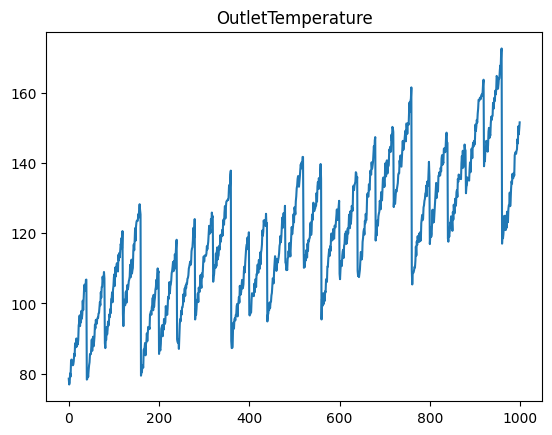

In [6]:
# Data Visualization
import matplotlib.pyplot as plt
df['outlet_temp'].plot()
plt.title("OutletTemperature")

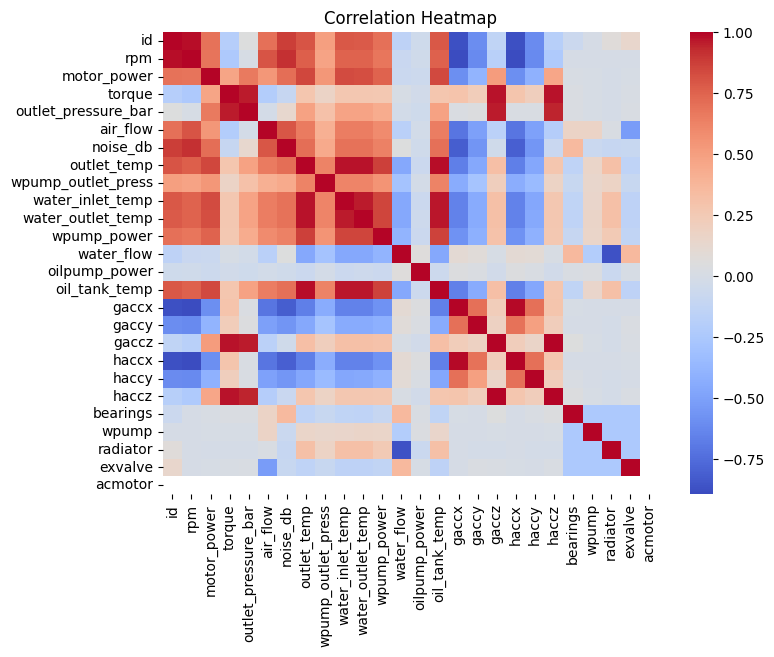

In [7]:
# Observing Correlation for feature selection
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Dropping unimportant features
df=df.drop(['id','oilpump_power','gaccx','gaccy','gaccz','haccx','haccy','haccz','acmotor'],axis=1)

In [9]:
# Scaling
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)
scaled_data.head()

,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,water_outlet_temp,wpump_power,water_flow,oil_tank_temp,bearings,wpump,radiator,exvalve
0,-1.414501,-1.307440,-1.159221,-1.640349,-1.008727,-1.561431,-2.108796,0.353860,-2.138658,-2.403142,-1.477725,0.816663,-2.200995,-0.5,-0.5,-0.5,-0.5
1,-1.394708,-1.295365,-0.971045,-1.596843,-1.009758,-1.605684,-2.195234,-0.577740,-1.914585,-2.025159,-1.799244,0.828340,-2.103022,-0.5,-0.5,-0.5,-0.5
2,-1.420156,-1.266100,-0.839768,-1.442157,-1.010789,-1.551736,-2.161525,-1.509341,-1.809172,-2.245144,-2.127082,0.810114,-2.004340,-0.5,-0.5,-0.5,-0.5
3,-1.441362,-1.235583,-0.684141,-1.269208,-1.011698,-1.609816,-2.030032,-1.564841,-1.939012,-1.846022,-1.688099,0.809391,-2.145555,-0.5,-0.5,-0.5,-0.5
4,-1.415915,-1.223030,-0.584946,-1.247724,-1.012021,-1.512592,-2.078671,-1.012497,-1.745235,-2.072820,-1.987954,0.828677,-2.142528,-0.5,-0.5,-0.5,-0.5


In [10]:
# Target variable: outlet_temp
from sklearn.model_selection import train_test_split
X = scaled_data.drop(['outlet_temp'],axis=1)
y = scaled_data['outlet_temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train =  y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (800, 16) (800, 1)
Testing set shape: (200, 16) (200, 1)


In [32]:
# Building the model
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=6000, learning_rate=0.1, random_state=42, max_depth=8, min_samples_split=5, min_samples_leaf=1,max_features=16, subsample=0.99)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=8, max_features=16, min_samples_split=5,
                          n_estimators=6000, random_state=42, subsample=0.99)

In [33]:
# Predicting on test data
predictions = model.predict(X_test)

In [34]:
# Calculating RMSE
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.14022759638238758
